### Data preprocessing

In this part, we will be making the data ready to feed the model. The model we will use to predict the data will be `Decision tree` , `logistic regression` and `Random forest`.<br>
* Firstly we will change the data to simple categories using an sklearn tool called `Labelencoder`
* We then split the data to `Training data` and `Test data`
* Feed the data to the model and predict `status group`.

In [26]:
# import the previous notebook and all its contents

from ipynb.fs.full.Index import * 

In [3]:
# display the data drame once more
df

,gps_height,installer,longitude,latitude,basin,region,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,status_group,construction_year_bins
0,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,109,True,False,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional,"(1990, 2000]"
1,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,280,False,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,"(2000, 2010]"
2,686,World vision,37.460664,-3.821329,Pangani,Manyara,250,True,True,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,"(2000, 2010]"
3,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58,True,True,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,"(1980, 1990]"
4,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,281,True,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,"(1990, 2000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,125,True,True,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,functional,"(1990, 2000]"
59396,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,56,True,True,gravity,vwc,pay annually,soft,enough,river,communal standpipe,functional,"(1990, 2000]"
59397,0,unknown,34.017087,-8.750434,Rufiji,Mbeya,281,True,False,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,functional,"(1990, 2000]"
59398,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,281,True,True,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,functional,"(1990, 2000]"


In [4]:
#create a copy of the original df
copy_df = df.copy()

Convert data to numeric data.
* `0` - functional<br>
* `1` - functional needs repair
* `2` - non-functional

In [5]:
# transform the target to numeric data
target = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
copy_df['status_group'] = copy_df['status_group'].replace(target)

In [6]:
# get the value counts to see if it transformed
copy_df['status_group'].value_counts()

0    32054
2    22659
1     4316
Name: status_group, dtype: int64

Change the boolean columns to integers

In [7]:
#changing from True/False to 0-1
#convert True/False in public meeting column to 0-1
copy_df['public_meeting'] = copy_df['public_meeting'].astype(bool).astype(int)
#convert True/False in permit column to 0-1(boolean to int)
copy_df['permit'] =copy_df['permit'].astype(bool).astype(int) 

##### Group the data to categorical and numerical data

In [8]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59029 entries, 0 to 59399
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   gps_height              59029 non-null  int64   
 1   installer               59029 non-null  object  
 2   longitude               59029 non-null  float64 
 3   latitude                59029 non-null  float64 
 4   basin                   59029 non-null  object  
 5   region                  59029 non-null  object  
 6   population              59029 non-null  int64   
 7   public_meeting          59029 non-null  int64   
 8   permit                  59029 non-null  int64   
 9   extraction_type_group   59029 non-null  object  
 10  management              59029 non-null  object  
 11  payment                 59029 non-null  object  
 12  water_quality           59029 non-null  object  
 13  quantity                59029 non-null  object  
 14  source                

In [9]:
# categorical features placed in a variable  

categorical_list = ['installer','basin','region','extraction_type_group','management','payment','water_quality','quantity',
               'source','waterpoint_type','construction_year_bins']
               
numerical_list = ['gps_height','longitude','latitude','population','public_meeting',
             'permit']

In [10]:
copy_df.columns

Index(['gps_height', 'installer', 'longitude', 'latitude', 'basin', 'region',
       'population', 'public_meeting', 'permit', 'extraction_type_group',
       'management', 'payment', 'water_quality', 'quantity', 'source',
       'waterpoint_type', 'status_group', 'construction_year_bins'],
      dtype='object')

##### Converting Ternary to binary

In our target variable, we will want to have only two variables. Considering some are fully `functional` , we will have them as `1`  and `0` for the one the ones that have probelems(`non-functional` and `functional need repair`)<br>
* `1` - Functional
* `0` - Has problems( needs repair and non-functional)

In [11]:
# convert ternary classes to binary class
status_group_dict = {0:1, 1: 0, 2 : 0}
copy_df['status_group'] = copy_df['status_group'].replace(status_group_dict )

In [12]:
# Check to see the converted columns
copy_df['status_group'].value_counts()

1    32054
0    26975
Name: status_group, dtype: int64

##### Preprocessing

Create a variable to hold the features(`X`) and another to hold the predicted `y`

In [13]:
# create the target variable and the predictors in form of x and y
X = copy_df.drop('status_group', axis=1)
y = copy_df['status_group']

Divide data into training and testing data

In [14]:
#import required libraries
from sklearn.model_selection import train_test_split
# to divide our X and y to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Pipeline to simplify the order of steps for the models. This simplification is used in all models to make it simple by using columnTransformer, numeric transformer to scale the numeric datatypes and categorical transformer to encode categories to numbers

In [30]:
# Import required libraries
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

# Transform numeric features to categories using a scaler
numeric_features=X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',RobustScaler())])
# Transform categorical features to numeric using an encoder
categorical_features=X_train.select_dtypes(include=['object','category']).columns
categorical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))])
    
# getting together our scaler and encoder with preprocessor
preprocessor=ColumnTransformer(transformers=[
    ('num',numeric_transformer,numeric_features),
    ('cat',categorical_transformer,categorical_features)])

### Modelling


#### Logistic regression

We use a classification model called logistic regression to try and predict the `status group`. We find the accuracy of the model using different hyperparameters by tuning.

##### Model 1

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score

lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(class_weight = 'balanced',
                                                        solver = 'lbfgs', 
                                                        random_state=42))])

# fit the model
lr.fit(X_train,y_train)  

# make predictions on training set
y_pred = lr.predict(X_train)

# make predictions on test set
y_pred_test = lr.predict(X_test)

print("Accuracy:")
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:")
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.7748131207250704
TEST: 0.7686769439268168

Balanced Accuracy:
TRAIN: 0.7694738281776943
TEST: 0.7641669623312926


##### Model 2

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score

lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(class_weight = 'balanced',
                                                        solver = 'liblinear', 
                                                        random_state=42))])

# fit the model
lr.fit(X_train,y_train)  

# make predictions on training set
y_pred = lr.predict(X_train)

# make predictions on test set
y_pred_test = lr.predict(X_test)

print("Accuracy:")
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:")
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.7789212883552507
TEST: 0.7683381331526342

Balanced Accuracy:
TRAIN: 0.7738845694028077
TEST: 0.7641549000802659


In logistic regression,we change the `solver` from lbfgs to liblinear. We find that the model accuracy decreases slightly. Our best solver would be lbfgs which uses algorithm l1. The best accuracy score is `76.87%`

#### Random forest

##### Model 3

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=50,
                                                            random_state=42, 
                                                            n_jobs=-1,
                                                            class_weight='balanced'))])
# fit the model
rf.fit(X_train, y_train) 
 
# make predictions on training set
y_pred = rf.predict(X_train)

# make predictions on test set
y_pred_test = rf.predict(X_test)

print("Accuracy:")
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:")
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9954683099337187
TEST: 0.8172115873284771

Balanced Accuracy:
TRAIN: 0.9952763421527655
TEST: 0.8145186216771636


##### Model 4

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=100,
                                                            random_state=42, 
                                                            n_jobs=-1,
                                                            class_weight='balanced'))])
# fit the model
rf.fit(X_train, y_train) 
 
# make predictions on training set
y_pred = rf.predict(X_train)

# make predictions on test set
y_pred_test = rf.predict(X_test)

print("Accuracy:")
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:")
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9961459458314804
TEST: 0.8172962900220228

Balanced Accuracy:
TRAIN: 0.9959745871998389
TEST: 0.8145089978476963


In Random Forest, we change the parameter on `n-estimators` from 50 to 100. This increases the run time and slightly overfits the model. The best parameters to use would be lower`n_estimators`. Our accuracy score would be `81.45%`

#### Decision Trees

##### Model 5

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='entropy', 
                                                            max_depth=4, 
                                                            min_samples_leaf=5, 
                                                            random_state=42, 
                                                            class_weight='balanced'))])
# fit the model
dt.fit(X_train, y_train) 
 
# make predictions on training set
y_pred = dt.predict(X_train)

# make predictions on test set
y_pred_test = dt.predict(X_test)

print("Accuracy:")
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:")
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.7186116934544607
TEST: 0.7115026257834999

Balanced Accuracy:
TRAIN: 0.6971731489875284
TEST: 0.6934490001245183


##### Model 6

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='gini', 
                                                            max_depth=4, 
                                                            min_samples_leaf=5, 
                                                            random_state=42, 
                                                            class_weight='balanced'))])
# fit the model
dt.fit(X_train, y_train) 
 
# make predictions on training set
y_pred = dt.predict(X_train)

# make predictions on test set
y_pred_test = dt.predict(X_test)

print("Accuracy:")
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:")
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.7188022785507062
TEST: 0.7112485177028629

Balanced Accuracy:
TRAIN: 0.6973481577379659
TEST: 0.6931745261995411


In decision trees classifier, we changed the criterion of choosing from entropy to gini. A Reduction in `max depth` or `min_sample_leaf` would mean we are trying to overfit the model. The best criterion to use is `Entropy` with an accuracy score of `69%`

#### K-Nearest Neighbour

In [27]:
from sklearn.neighbors import KNeighborsClassifier

k_n_n = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier(metric='manhattan',
                                                          n_neighbors=7,
                                                          weights='distance'))])
# fit the model
k_n_n.fit(X_train, y_train) 
 
# make predictions on training set
y_pred = k_n_n.predict(X_train)

# make predictions on test set
y_pred_test = k_n_n.predict(X_test)

print("Accuracy:")
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:")
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9960188891006501
TEST: 0.8023039132644418

Balanced Accuracy:
TRAIN: 0.995873113041984
TEST: 0.7989217271008048


In KNN the model has high accuracy score but the limitation is that it takes a lot of computational time making it expensive to run. In terms of accuracy, it would be the best, but its effeciency is not as good. The accuracy score is `79.89%`

#### Choosing the best model


In this part, we choose the best model to predict the status group. This model will use features i.e `['gps_height', 'installer', 'longitude', 'latitude', 'basin', 'region','population', 'public_meeting','permit','extraction_type_group','management', 'payment', 'water_quality', 'quantity', 'source','waterpoint_type','status_group', 'construction_year_bins']`. This features help to steer the model to predict which status group the waterpoint is in. Using this model, the NGO can predict the number of `functional` waterpoints and the waterpoints that `have problems` in order to know how to build better waterpoints

In [42]:
# Replace None with appropriate code
best_model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=100,
                                                            random_state=42, 
                                                            n_jobs=-1,
                                                            class_weight='balanced'))])
# fit the model
best_model.fit(X_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['gps_height', 'longitude', 'latitude', 'population', 'public_meeting',
       'permit'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['installer', 'basin', 'region', 'extraction_type_group', 'management',
       'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type',
       'construction_year_bins'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', n_jobs=-1,
                                        random_state=42))])

##### Confusion matrix

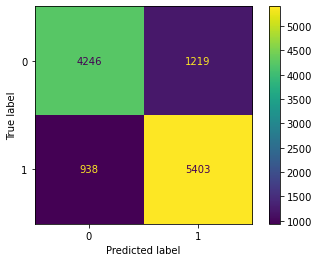

In [41]:
# import required libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test)  
plt.show()

#ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

The confusion nmatrix shows that `938` waterpoints were wrongly classified under `having problems`  when they were in fact `functional`. <br>
`1219` waterpoints were classififed under `functional` when they were in fact `having problems`<br>
`5403` waterpoints were classified under `functional` when they were in fact `functional`<br>
`4246` waterpoints were classified under `having problems` when they were in fact `having problems`

In [43]:
# Replace None with appropriate code
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss

preds = best_model.predict(X_test)
probs = best_model.predict_proba(X_test)


print("log loss: ", log_loss(y_test, probs))
print("accuracy: ", accuracy_score(y_test, y_pred_test))
print("precision:", precision_score(y_test, y_pred_test))
print("recall:   ", recall_score(y_test, y_pred_test))

log loss:  0.5221893408183617
accuracy:  0.7683381331526342
precision: 0.7651470588235294
recall:    0.8205330389528466


##### Cross validation score


In [46]:
#import required libraries
from sklearn.model_selection import cross_val_score

# Get the validation score
scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
print(scores.mean())

0.8942719049301294
